In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [33]:
df = pd.read_csv('Carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<h3> Lets try to explore the datasets

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [35]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [36]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [37]:
df.duplicated().sum()

0

<h3> Check the outlier

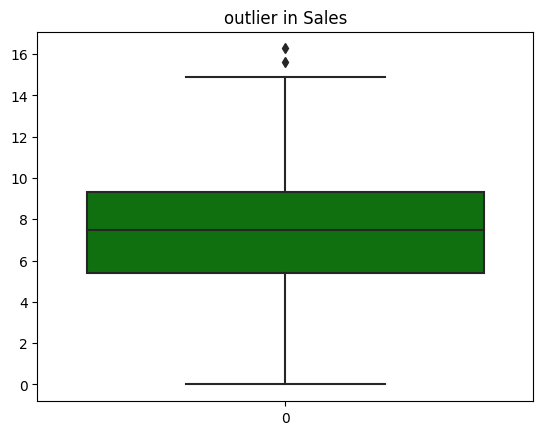

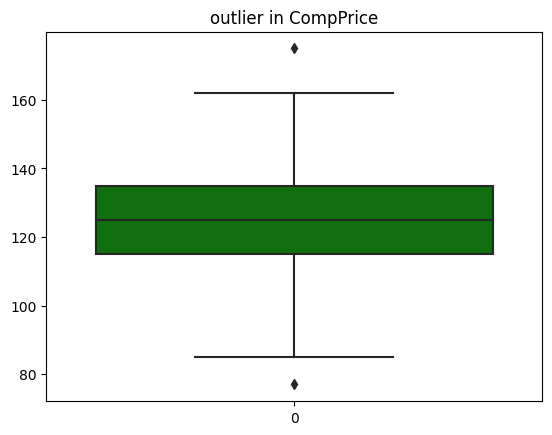

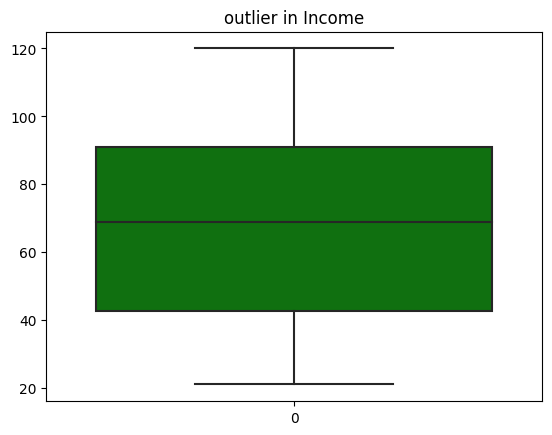

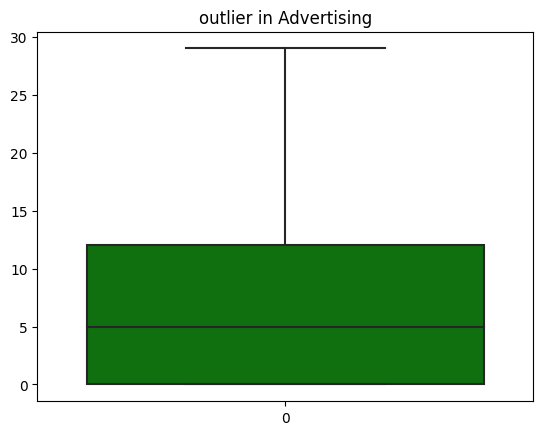

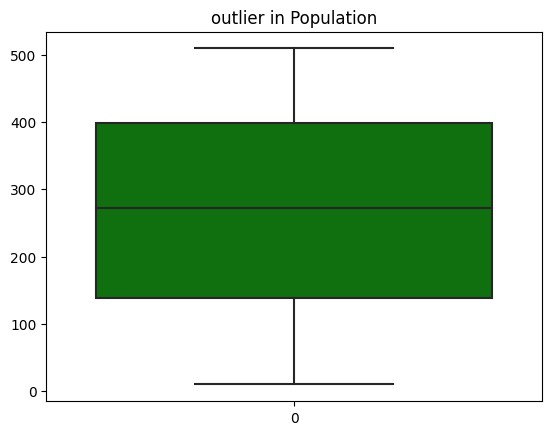

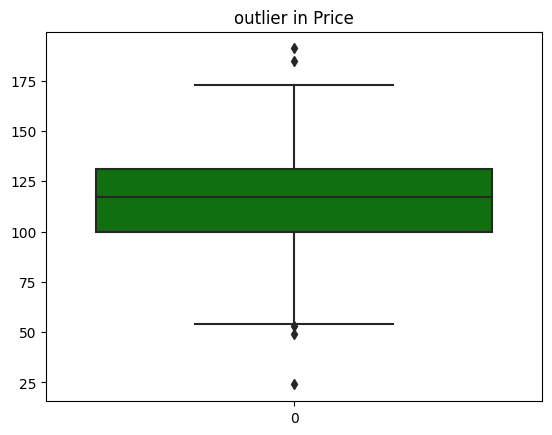

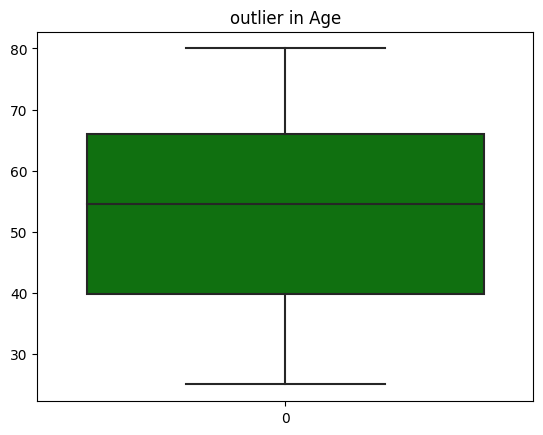

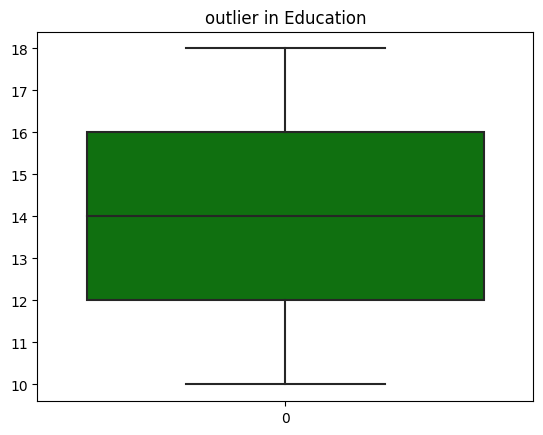

In [38]:
for i in df.columns:
    if i not in ['ShelveLoc', 'Urban', 'US']:
        sns.boxplot(df[i], color='g')
        plt.title('outlier in ' + i)
        plt.show()

There were few outlier in Sales, CompPrice, and Price

<h3> Remove the outliers </h3>
Try using InterQuartile Range (IQR) Method
    

In [39]:
outliers = ['Sales', 'CompPrice', 'Price']

for i in outliers:
    minimum, q1, middle, q3, maximum = np.quantile(df[i], [0, 0.25, 0.50, 0.75, 1])
    IQR = q3 - q1
    lower_fence = q1 - (IQR * 1.5)
    higher_fence = q3 + (IQR * 1.5)
    print("In " + i + " Column any values beyond the range " + str(lower_fence) + " and " + str(higher_fence) + " are outliers")

In Sales Column any values beyond the range -0.504999999999999 and 15.215 are outliers
In CompPrice Column any values beyond the range 85.0 and 165.0 are outliers
In Price Column any values beyond the range 53.5 and 177.5 are outliers


filter outlier in sales column

In [40]:
df = df[df['Sales'] <= 15.215]
df.shape

(398, 11)

filter outlier in CompPrice column

In [41]:
df = df[(df["CompPrice"]>=85.0) & (df["CompPrice"]<=165.0)]
df.shape

(396, 11)

filter outlier in price column

In [42]:
df = df[(df["Price"]>=53.5) & (df["Price"]<=177.5)]
df.shape

(392, 11)

<h3> View data distribution of all the features

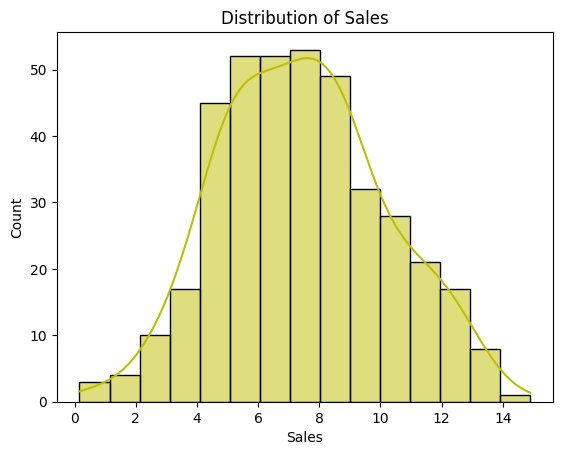

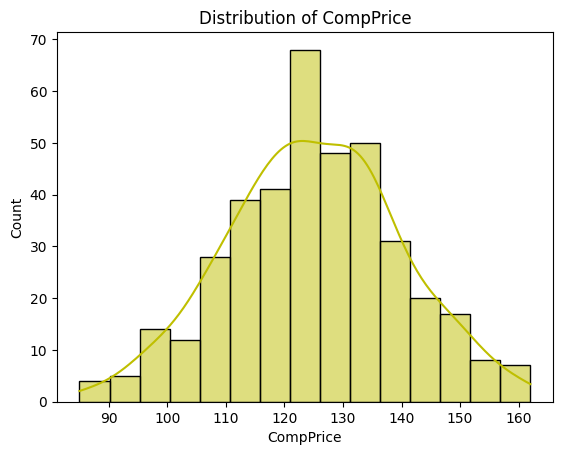

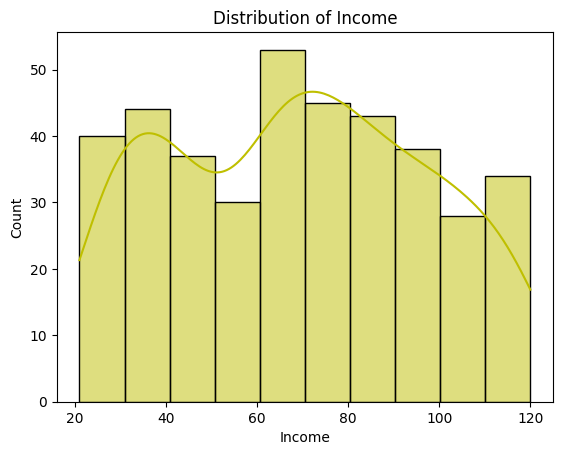

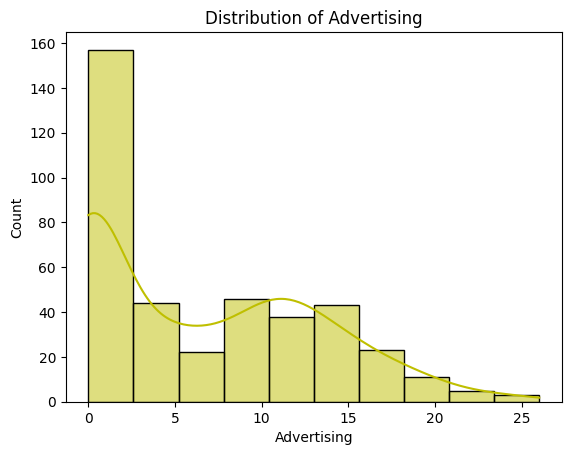

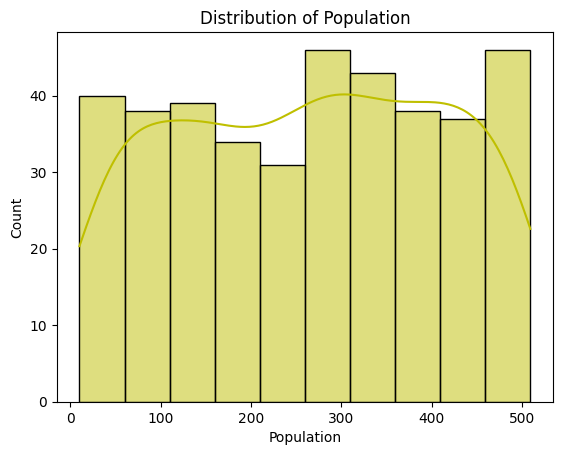

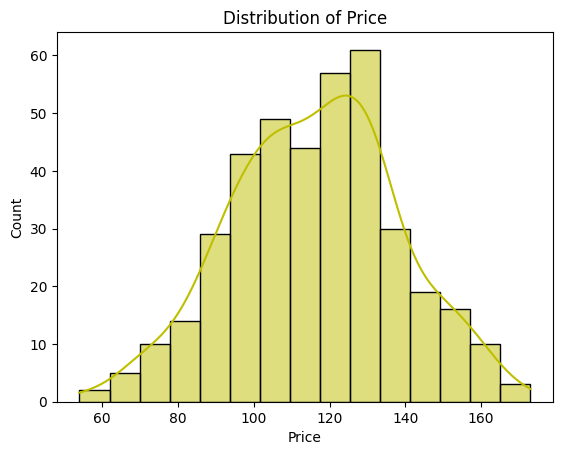

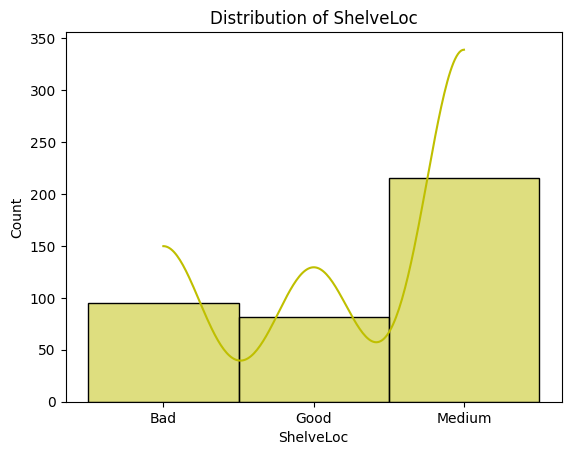

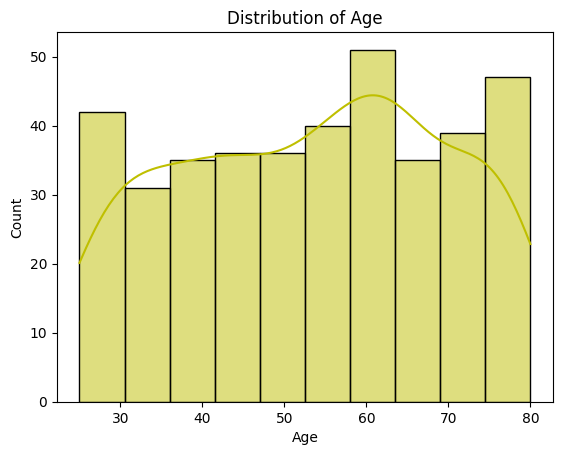

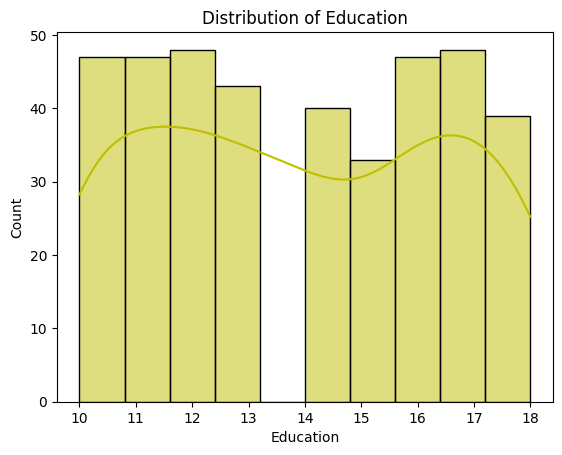

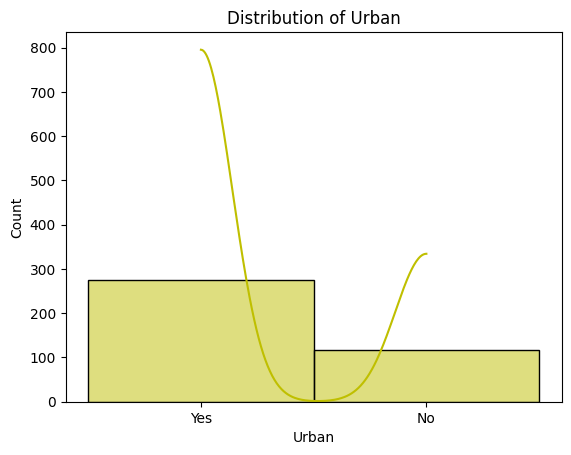

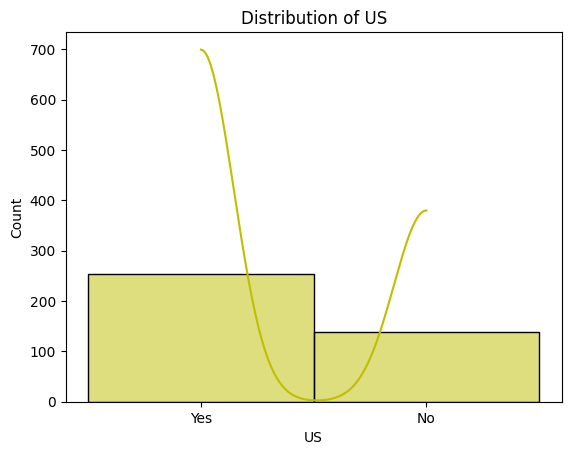

In [43]:
for i in df.columns:
    sns.histplot(df[i], kde=True, color='y')
    plt.title('Distribution of ' + i)
    plt.show()

* Sales, CompPrice, and Price were normally distributed
* Advertising is Right Skewed

<h3> Feature Engineering

In [47]:
encoder = LabelEncoder()

In [84]:
df['ShelveLoc'] = encoder.fit_transform(df['ShelveLoc'])
df['US'] = encoder.fit_transform(df['US'])
df['Urban'] = encoder.fit_transform(df['Urban'])

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
5,10.81,124,113,13,501,72,0,78,16,0,1
6,6.63,115,105,0,45,108,2,71,15,1,0


<h3> Feature Correlation

<Axes: >

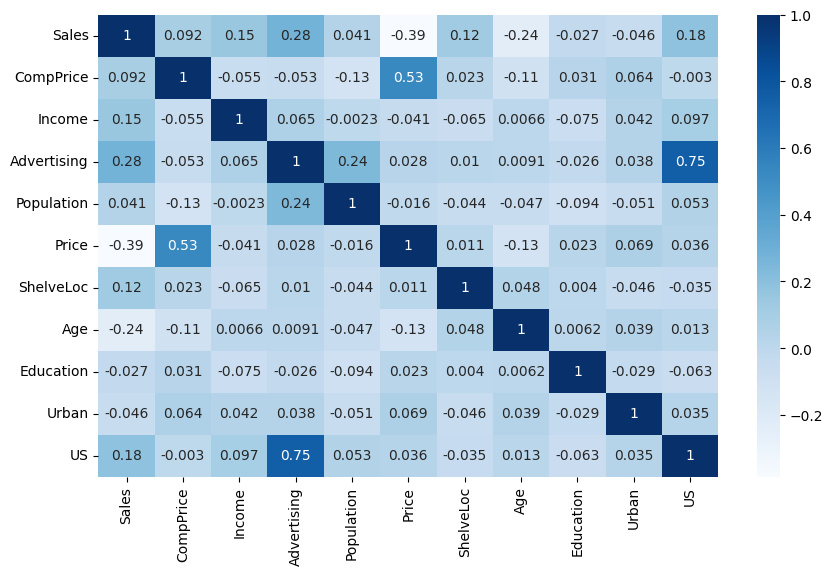

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(method="spearman"),annot=True, cmap='Blues')

<h3> Check and handling imbalanced dataset

In [79]:
df2 = pd.read_csv('Carseats.csv')

In [85]:
df['Urban_c'] = df2['Urban']
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
2,10.06,113,35,10,269,80,2,59,12,1,1,Yes
3,7.40,117,100,4,466,97,2,55,14,1,1,Yes
4,4.15,141,64,3,340,128,0,38,13,1,0,Yes
5,10.81,124,113,13,501,72,0,78,16,0,1,No
6,6.63,115,105,0,45,108,2,71,15,1,0,Yes


In [86]:
major=df[df['Urban_c'] == 'Yes']
major.shape

(274, 12)

In [91]:
minor=df[df['Urban_c'] == 'No']
minor.shape

(116, 12)

In [93]:
minor_new = resample(minor, replace=True, n_samples=len(major), random_state=42)
minor_new.shape

(274, 12)

In [94]:
df = pd.concat([minor_new, major])
df.shape

(548, 12)

In [95]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
349,9.32,134,27,18,467,96,2,49,14,0,1,No
158,12.53,142,90,1,189,112,1,39,10,0,1,No
299,9.40,135,40,17,497,96,2,54,17,0,1,No
46,12.44,127,90,14,16,70,2,48,15,0,1,No
360,8.77,118,86,7,265,114,1,52,15,0,1,No


In [96]:
df=df.sample(frac=1)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
184,9.95,132,33,7,35,97,2,60,11,0,1,No
200,5.56,144,92,0,349,146,2,62,12,0,0,No
160,4.67,111,28,0,486,111,2,29,12,0,0,No
70,9.46,89,81,15,237,99,1,74,12,1,1,Yes
110,9.00,128,62,7,125,116,2,43,14,1,1,Yes


In [97]:
df.reset_index(inplace=True)

In [98]:
df.head()

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
0,184,9.95,132,33,7,35,97,2,60,11,0,1,No
1,200,5.56,144,92,0,349,146,2,62,12,0,0,No
2,160,4.67,111,28,0,486,111,2,29,12,0,0,No
3,70,9.46,89,81,15,237,99,1,74,12,1,1,Yes
4,110,9.00,128,62,7,125,116,2,43,14,1,1,Yes


In [99]:
df.drop('index', axis=1, inplace=True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
0,9.95,132,33,7,35,97,2,60,11,0,1,No
1,5.56,144,92,0,349,146,2,62,12,0,0,No
2,4.67,111,28,0,486,111,2,29,12,0,0,No
3,9.46,89,81,15,237,99,1,74,12,1,1,Yes
4,9.00,128,62,7,125,116,2,43,14,1,1,Yes


In [100]:
df.shape

(548, 12)

<Axes: xlabel='Urban_c', ylabel='Count'>

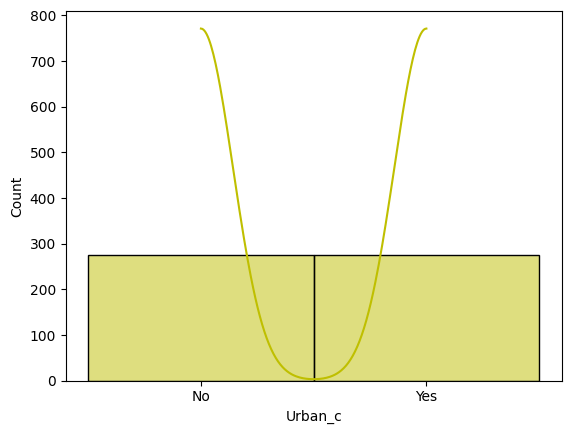

In [102]:
sns.histplot(df['Urban_c'], kde=True, color='y')

<h3> Split independent(x) and dependent(y) feature

In [103]:
X = df.drop(['Urban', 'Urban_c'], axis=1)
y = df['Urban']

In [105]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
X = pd.DataFrame(X_new, columns=X.columns)
X.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US
0,0.799071,0.490697,-1.265973,0.010200,-1.540072,-0.773338,0.759771,0.416067,-1.143792,0.737334
1,-0.775302,1.342551,0.760938,-1.047274,0.499011,1.453545,0.759771,0.535379,-0.757595,-1.356237
2,-1.094480,-1.000048,-1.437745,-1.047274,1.388674,-0.137086,0.759771,-1.433264,-0.757595,-1.356237
3,0.623344,-2.561781,0.383039,1.218741,-0.228305,-0.682445,-0.468413,1.251249,-0.757595,0.737334
4,0.458375,0.206746,-0.269695,0.010200,-0.955621,0.090147,0.759771,-0.598082,0.014800,0.737334


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((411, 10), (137, 10), (411,), (137,))

In [109]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [124]:
y_pred=model.predict(X_test)
print("Accuracy : " + str(accuracy_score(y_test, y_pred)))

Accuracy : 0.8394160583941606


Text(50.722222222222214, 0.5, 'Predicted')

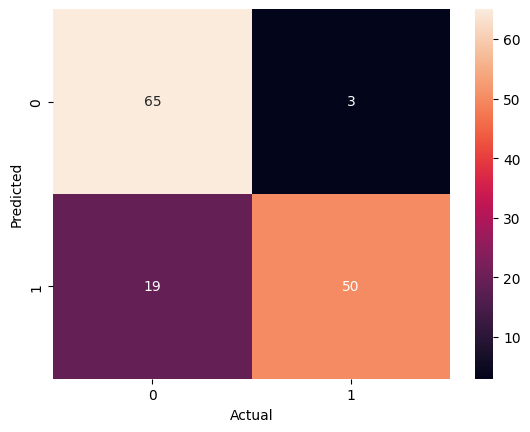

In [120]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        68
           1       0.94      0.72      0.82        69

    accuracy                           0.84       137
   macro avg       0.86      0.84      0.84       137
weighted avg       0.86      0.84      0.84       137



<h3> Hyperparameter tuning 

In [128]:
grid={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[11,12,13],
  'max_features':['auto', 'sqrt', 'log2']
}

In [132]:
clf=GridSearchCV(model, param_grid=grid, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [11, 12, 13],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [133]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [138]:
model = DecisionTreeClassifier(criterion='gini', max_depth=11, max_features='sqrt', splitter='best')
model.fit(X_train, y_train)

print(model.score(X_train, y_train), model.score(X_test, y_test))

0.9854014598540146 0.7445255474452555


In [139]:
y_pred=model.predict(X_test)
print("Accuracy : " + str(accuracy_score(y_test, y_pred)))

Accuracy : 0.7445255474452555


In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77        68
           1       0.83      0.62      0.71        69

    accuracy                           0.74       137
   macro avg       0.76      0.75      0.74       137
weighted avg       0.76      0.74      0.74       137



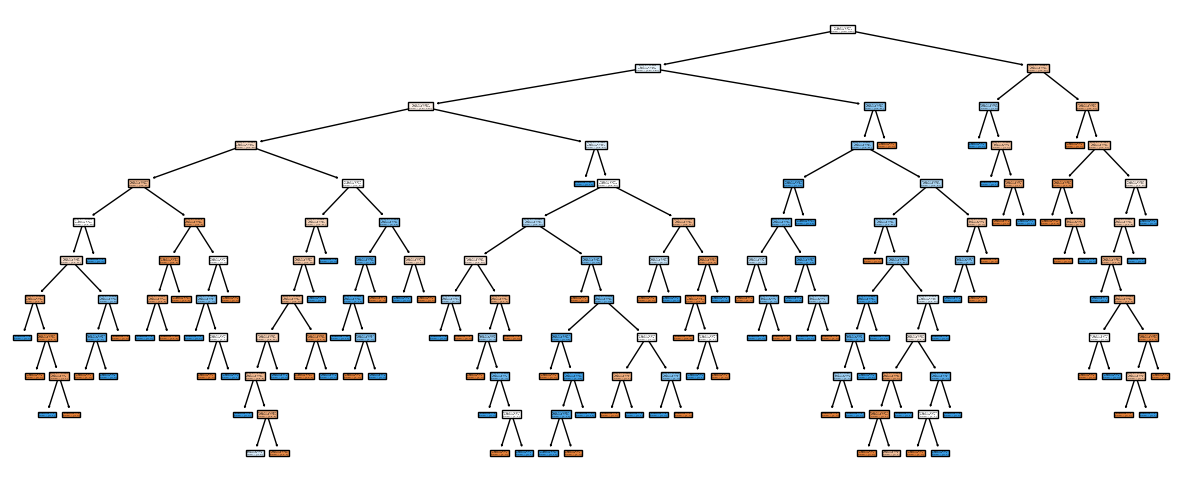

In [141]:
plt.figure(figsize=(15,6))
tree.plot_tree(model,filled=True)
plt.show()

<h3> Conclusion </h3>
* Default model has given us better results than HyperParameter Tuning model 